# Quality assessment of glacier mass change data from satellite and in-situ observations: resolution and coverage for trend analysis in glaciological and climatological monitoring

- Data stream: satellite (observations), in-situ (observations)
- Quality area: completeness, resolution, trend assessment
- Application area: glaciological, climatological and/or hydrlogical applications, monitoring and models

Production date: 17-07-2024

Produced by: Yoni Verhaegen and Philippe Huybrechts (Vrije Universiteit Brussel)

## Use case: Using glaciers and their mass changes as indicators for climatic changes at the global scale in the context of the current global warming

## Quality assessment question: "Does the dataset have adequate spatial/temporal resolution, coverage (extent) and sampling density to derive multi-year trends in glacier mass changes, hereby enabling their use as indicators of global climate change?"

Glaciers are a major contributor to current global sea-level rise, a resource of fresh water, a potential threat of natural hazards, and an important factor for hydro-power production and runoff, as well as for recreation and tourism. A proper assessment of glacier mass changes due to warming climatic conditions therefore plays a crucial role in dealing with these issues. In that regard, the 'Glacier mass change gridded data from 1976 to present derived from the Fluctuations of Glaciers Database' dataset provides key information with respect to glacier mass change data at various spatial and temporal scales. The dataset on the CDS is based on the Fluctuations of Glaciers (FoG) dataset (here we use version 2023-09), which are currently the most complete available datasets in terms of glacier mass changes, with a nearly global coverage (Zemp et al., 2019). It is a compilation of research data from in-situ, air and spaceborne methods (e.g. WGMS, 2022; Berthier et al., 2023), which have been put together and organized into one single gridded dataset. However, several known issues still persist in the dataset of which the user should take note before using the product. This notebook investigates how well the glacier mass change dataset (here we use version 2023-09) can be used as an indicator for climatic changes at the global scale. More specifically, the notebook evaluates whether the dataset is of sufficient maturity and quality for that purpose in terms of its spatial and temporal resolution and coverage (extent). When measured over a long period and at extended geographical scales, trends in glacier mass balance can namely be considered a clear indicator of global climate change.

## 📌 Quality assessment statement

- The glaciers mass change dataset that is on the CDS is currently the most complete dataset of glacier mass change data in terms of its spatial coverage. It is generally considered the main reference dataset to determine the glaciers mass change across the globe.
- The data can be considered highly mature and complete in terms of its spatial and temporal coverage. The glacier mass change products are at this stage therefore found to be highly suitable to derive statistical properties such as mean, variability and trends (and hence to deduce climate change signals), as there are no spatial/temporal gaps in the data series, the temporal resolution is consistent at a yearly basis, and the number of consecutive years (the data record length) is sufficient (> 30 years) to filter out interannual variability. The gridded nature of the dataset furthermore allows to monitor climate change on the local, regional and global scale.
- There is, however, no information given related to quantitative estimates of the sampling density (e.g. the number of sampled glaciers per grid point or the number of glaciers with either a glaciological or geodetic mass balance sample per grid point). This can be important because glaciers with a seasonal to annual glaciological (i.e. the 'surface' mass balance) sample (ca. 500 glaciers) form the basis for the determination of annual mass changes from a broader set of multi-annual to decadal geodetic mass balances (i.e. the 'total' mass balance, including internal and basal mass balance) of neigbouring glaciers (ca. 208,000 glaciers), which may affect the mass change representativeness if these glaciers are located at large distances from each other.
- In other words, despite some limitations related to the lack of quantitative estimates of the sampling density and the reliance of the data on a smaller subset of annually sampled glaciers, the dataset is found to be highly suitable to monitor and derive global (cumulative) mass changes in space and time and to, for example, use the glacier mass change data as climate change indicators in the context of climate change monitoring. The dataset has thus sufficient quality in terms of its spatial (0.5 by 0.5 degrees) and temporal (annual) resolution (when compared to the minimum GCOS requirements) and spatial (i.e. global) and temporal (i.e. since 1975-76) coverage/extent. The observed accelerated decrease in mass change over time on a global scale aligns with theoretical considerations, adding further credibility to the dataset.
- When using the glacier mass change dataset that is available on the CDS, users should be aware of other typical problems with the dataset. One of such problems is the fact that data can not be consulted at the individual glacier-scale. This can impact the quality and suitability of the data for similar glaciological, hydrological, and climatological applications, such as for example for the purpose of water resource management at the local (individual glaciers) scale. Data were furthermore measured and generated by different institutes/research groups and from different methods (i.e. the in-situ glaciological and satellite-based geodetic methods). As such, they were (with a high degree of certainty) not compiled in a fully consistent way for the entire dataset.

## ❓ Methodology

### Short description

The mass balance of a glacier is the difference between mass gained (from snow accumulation) and mass lost (by meltwater runoff or solid ice discharge into lakes/the ocean), which is the same as the net mass change of a glacier. In general, the basis for the derived gridded mass changes are individual measurements (mainly glaciological in-situ local annual surface mass balance measurements) and geodetic spaceborne elevation change data (a surface elevation/ice thickness change or an ice volume change over time). These data are converted into an averaged specific mass balance value (i.e. mostly reported with units of meter water equivalent and often shortened to m w.e.) for an individual glacier. Afterwards, the data are submitted to the World Glacier Monitoring Service (WGMS). Further processing of the data results in a gridded (0.5° global grid) glacier mass change product with global coverage and dating back until the 1975-76 hydrological year. Each grid cell therefore contains a time series of total glacier mass change (in Gt yr⁻¹) or mass balance data (in m w.e. yr⁻¹) of all glaciers within the specific grid cell. In this notebook, we use version 2023-09. For a more detailed description of the data acquisition and processing methods, we refer to the documentation on the CDS and the ECMWF Confluence Wiki.

### Structure and (sub)sections

In this notebook, the applicability of glacier mass change data to be used as indicators for climatic changes at the global scale in the context of the current global warming will be assessed. We will furthermore check whether the data are of sufficient adequacy in terms of its spatial/temporal resolution and coverage to be used for this purpose. This will be realized by analyzing the spatial and temporal characteristics of linear and quadratic glacier mass change trends, by assessing the spatial and temporal coverage of the dataset, by discussing other potential limitations and error sources of the dataset, and by evaluating the implications for the usage of the data in terms of the specific use case and question (i.e. using glacier mass changes as indicators for climate change at the global scale). The structure is as follows:

- **Data preparation and processing**: this section loads packages, defines requests for download from the CDS, downloads the actual data and inspects the data to reveal its structure. Also the functions that are used in this notebook are defined in this section.
- **Analysis of sampling density and spatio-temporal resolution/extent of glacier mass changes**: this section discusses the temporal and geographical resolution/coverage of the data in the glacier mass change product. We discuss the length of the time series, and compare values for the glacier area (that are used as input for the glacier mass change calculations) and the trend over time, to values from other reference datasets. At last, we briefly discuss the (lack of) quantitative estimates of the sampling density and its related limitations.
- **Spatial distribution of glacier mass change (linear and quadratic) trends**: this section derives the pixel-by-pixel cumulative sum of glacier mass changes as well as linear and quadratic (accelerations) glacier mass change trends since 1975-76 and plots them on a world map to discuss its spatial patterns and statistical significance.
- **Trends in global total glacier mass changes**: here, we calculate the linear and quadratic trend of the globally aggregated glacier mass change time series. We also express the glacier mass changes in terms of climate warming stripes for a better visualization of the glacier mass changes over time. We quantify the slope (in Gt yr⁻¹) and acceleration (in Gt yr⁻²) of the linear and quadratic trends.
- **Implications for use of glacier mass change data as climate change indicators**: the final section uses all information derived above to assess the suitability of the glacier mass change dataset (with respect to the spatial/temporal resolution, coverage (extent) and sampling density) to use the glacier mass change product as a clear indicator for climatic changes at the (local, regional and) global scale in the context of the current global warming.

## 📋 Analysis and results

### ⏬ Data preparation and processing

First we load the packages:

In [2]:
import fsspec
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import xarray as xr
import rasterio.features
from rasterio.transform import from_origin
from scipy.stats import linregress
import xskillscore as xs
import os
os.environ["CDSAPI_RC"] = os.path.expanduser("~/verhaegen_yoni/.cdsapirc")
from c3s_eqc_automatic_quality_control import download

plt.style.use("seaborn-v0_8-notebook")

Then we define the parameters, i.e. for which years we want the glacier mass change data to be downloaded:

In [3]:
period_start = "1975_1976"
period_stop = "2021_2022"
assert all("_" in period and len(period) == 9 for period in (period_start, period_stop))

Define a function to calculate the sum, linear trend and acceleration:

In [4]:
def compute_coeff_and_pvalue(cumsum, degree):
    coeff = cumsum.polyfit("time", degree)
    (fit,) = xr.polyval(cumsum["time"], coeff).data_vars.values()
    p_value = xs.pearson_r_p_value(cumsum.chunk(time=-1), fit.chunk(time=-1), "time")
    return coeff, p_value

def compute_time_statistics(ds):
    with xr.set_options(keep_attrs=True):
        cumsum = ds["glacier_mass_change_gt"].cumsum("time").drop_vars("time")
        ds["uncertainty_gt"] = (ds["uncertainty_gt"] ** 2).sum("time") ** (1 / 2)
        non_nan_counts = ds["glacier_mass_change_gt"].count(dim="time").where(ds["glacier_mass_change_gt"].count(dim="time") != 0)

    # Sum
    ds = ds.sum("time", keep_attrs=True)
    for da in ds.data_vars.values():
        da.attrs["long_name"] = f"Sum of {da.attrs['long_name']}"

    # Linear
    coeff, p_value = compute_coeff_and_pvalue(cumsum, 1)
    ds["Slope"] = coeff["polyfit_coefficients"].sel(degree=1)
    ds["Slope"].attrs = {
        "long_name": f"Linear trend of {da.attrs['long_name']}",
        "units": f"{da.attrs['units']} yr$^{-1}$",
    }
    ds["Pvalue1"] = p_value
    ds["Pvalue1"].attrs = {
        "long_name": f"Linear p-value of {da.attrs['long_name']}",
    }

    # Quadratic
    coeff, p_value = compute_coeff_and_pvalue(cumsum, 2)
    ds["Acceleration"] = 2 * coeff["polyfit_coefficients"].sel(degree=2)
    ds["Acceleration"].attrs = {
        "long_name": f"Quadratic trend of {da.attrs['long_name']}",
        "units": f"{da.attrs['units']} yr$^{-2}$",
    }
    ds["Pvalue2"] = p_value
    ds["Pvalue2"].attrs = {
        "long_name": f"Quadratic p-value of {da.attrs['long_name']}",
    }

    return ds

def compute_spatial_statistics(ds):
    with xr.set_options(keep_attrs=True):
        return ds.sum(("latitude", "longitude"))

Then we define requests for download from the CDS and download and transform the glacier mass change data.

In [5]:
# Set request
y0_start, y1_start = map(int, period_start.split("_"))
y0_stop, y1_stop = map(int, period_stop.split("_"))
collection_id = "derived-gridded-glacier-mass-change"
request = {
    "variable": "glacier_mass_change",
    "product_version": "wgms_fog_2023_09",
    "format": "zip",
    "hydrological_year": [
        f"{y0}_{str(y1)[-2:]}"
        for y0, y1 in zip(range(y0_start, y0_stop + 1), range(y1_start, y1_stop + 1))
    ],
}

# Download glacier mass change data
print("Downloading and handling glacier mass change data...")

chunks = {"hydrological_year": 1}
ds = download.download_and_transform(
    collection_id,
    request,
    chunks=chunks,
    transform_func=compute_time_statistics,
    transform_chunks=False,
)
ds_timeseries = download.download_and_transform(
    collection_id,
    request,
)

# Customize some attributes
for obj in (ds, ds_timeseries):
    for da in obj.data_vars.values():
        da.attrs["long_name"] = da.attrs["long_name"].replace("_", " ").title()
ds_timeseries["time"] = ds_timeseries["time"].dt.year
ds_timeseries["time"].attrs |= {"long_name": "Time", "units": "yr"}

print("Downloading and data handling done.")

100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


Let us inspect the data:

In [6]:
ds_timeseries

<xarray.Dataset> Size: 487MB
Dimensions:                  (time: 47, latitude: 360, longitude: 720)
Coordinates:
  * time                     (time) int64 376B 1976 1977 1978 ... 2020 2021 2022
  * latitude                 (latitude) float64 3kB 89.75 89.25 ... -89.75
  * longitude                (longitude) float64 6kB -179.8 -179.2 ... 179.8
Data variables:
    glacier_mass_change_gt   (time, latitude, longitude) float64 97MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    glacier_mass_change_mwe  (time, latitude, longitude) float64 97MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    glacier_area_km2         (time, latitude, longitude) float64 97MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    uncertainty_gt           (time, latitude, longitude) float64 97MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    uncertainty_mwe          (time, latitude, longitude) float64 97MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
Attributes:
    title:                 Global gridded annual glacier mass changes
    data_version:          version-wgms-fog-2023-09
    project:               Copernicus Climate Change Service (C3S) Essential ...
    institution:           World Glacier Monitoring Service - Geography Depar...
    created_by:            Dr. Ines Dussaillant - ines.dussaillant@geo.uzh.ch
    references:            Fluctuation of Glaciers (FoG) database version wgm...
    citation:              Dussaillant, I., Bannwart, J., Paul, F., Zemp, M. ...
    conventions:           CF Version CF-1.8
    dataset_description:   Horizontal resolution: 0.5° (latitude - longitude)...
    dataset_limitations:   Grid-point artefact in polar regions: see Algorith...
    dataset_improvements:  Improvements of product version WGMS-FOG-2023-09 w...
    comments:              Conversions between annual grid point mass change ...

It is a gridded dataset at a 0.5 by 0.5 degree spatial resolution containing annual values of the total glacier mass change (in Gt yr$^{-1}$) of a grid cell (`glacier_mass_change_gt`) and its uncertainty (`uncertainty_gt`) since the 1975-76 hydrological year. Mass changes (mass balances in this case) and their uncertainty can also be extracted in units of m w.e. yr$^{-1}$ (`glacier_mass_change_mwe` and `uncertainty_mwe`). Note that not all grid cells exhibit the same absolute total surface area, as grid cells get smaller towards the poles. The parameterized absolute glacier surface area is furthermore also available in this dataset by the variable `glacier_area_km2`. 

For conversion purposes, glacier mass changes (in Gt yr$^{-1}$) have been converted into glacier mass balances (in m w.e. yr$^{-1}$) by dividing the mass changes (in Gt yr$^{-1}$ multiplied by $1*10^{12}$ to get values in kg yr$^{-1}$) by the product of the density of water (1000 kg m$^{-3}$) and the glacier area (in km$^{2}$ multiplied by $1*10^6$ to get values in m$^2$).

### ✅ Analysis of sampling density and spatio-temporal resolution/extent of glacier mass changes

Let us print some attributes of the dataset to reveal its spatial and temporal resolution, as well as the temporal coverage/extent:

In [7]:
print(ds.attrs['dataset_description'])

Horizontal resolution: 0.5° (latitude - longitude), GCS_WGS_1984Temporal resolution: Annual, hydrological yearTemporal coverage: 1975/76-2021/22Observational sample: 96% of world glaciers with valid observations


The dataset has a spatial resolution of 0.5 by 0.5 degrees and a temporal resolution of 1 hydrological year. Although no specific thresholds are given for the spatial resolution of glacier mass change data by GCOS (2022), the annual temporal resolution satisfies the minimum threshold. The goal would, however, be to have glacier mass changes at monthly time scales (GCOS, 2022). The dataset does not provide data at a sufficiently fine resolution to capture the mass changes of individual glaciers, but the spatial resolution and grid size of 0.5 by 0.5 degrees are appropriate for detecting regional differences in glacier mass changes.

Let us examine the temporal extent of the dataset:

In [8]:
print(f"The temporal extent of the glacier mass change dataset is {np.shape(ds_timeseries['time'])[0]} years.")

The temporal extent of the glacier mass change dataset is 47 years.


To determine whether the temporal extent of the glacier mass change dataset is sufficient to capture reliable temporal trends in global glacier mass changes and to use these trends as indicators of climatic changes, we turn to the literature. The Intergovernmental Panel on Climate Change (IPCC) often uses 30 years as a standard period for climate normals and trend analysis to ensure that the analysis captures meaningful climatic changes rather than short-term (intra/interannual) fluctuations. We therefore consider these guidelines to be likewise applicative for glacier mass changes. When measured over a long period (> 30 years), trends in glacier mass changes or mass balances can therefore be considered a clear indicator of global climate change. Longer periods, as is here the case, provide even more robust trend estimates and reduce the influence of short-term variability.

To have an idea of the temporal coverage of the gridded dataset, we can plot the number of years that hold non-NaN mass change data for each pixel. If the pixel exhibits complete temporal coverage, the value should equal the number of years in the time dimension `time` of the dataset. In the map below, pixels where the time series of glacier mass change data has an amount of non-NaN values that equal the number of years in the time dimension of the data array are colored green, else they are colored red:

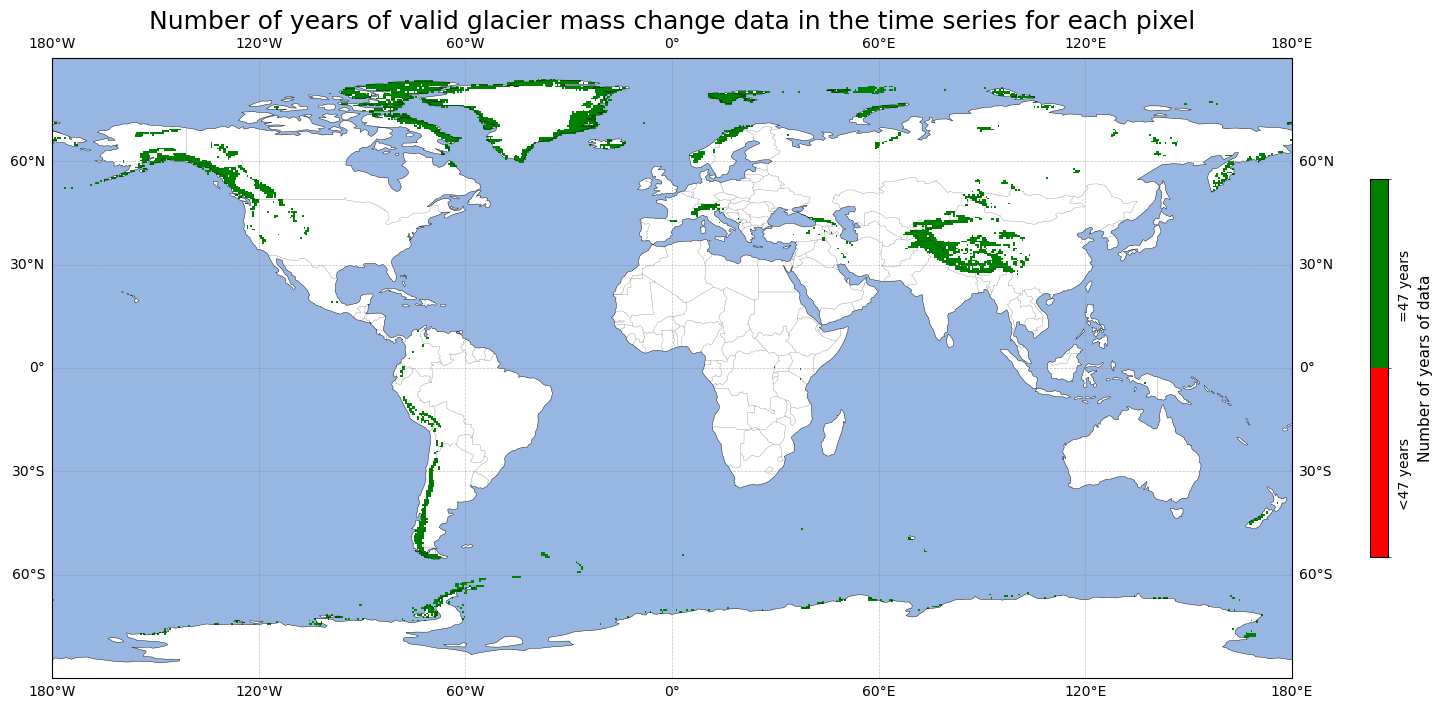

In [10]:
# Define the boundaries for the colorbar
bounds = [0, 0.5, 1]  # Green (0), Red (1)
cmap = mpl.colors.ListedColormap(['red', 'green'])
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
lon_grid, lat_grid = np.meshgrid(ds["longitude"].values, ds["latitude"].values)
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND,color='w')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linewidth=0.25, alpha=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
valid_counts = ds_timeseries["glacier_mass_change_gt"].count(dim="time")
total_time_points = np.shape(ds_timeseries["time"])[0]
full_time_series_counts = valid_counts.where(valid_counts == total_time_points)
# Plot the data
im = ax.pcolormesh(ds_timeseries["longitude"].values, ds_timeseries["latitude"].values, full_time_series_counts, 
                   transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
cb = fig.colorbar(im, ax=ax, shrink=0.49, label='Number of years of data', spacing="uniform")
cb.set_ticks([0.3, 0.8])  # Set the ticks at the midpoints of the ranges
cb.set_ticklabels([f'<{np.shape(ds_timeseries["time"])[0]} years', f'={np.shape(ds_timeseries["time"])[0]} years'])  # Set the tick labels
cb.ax.yaxis.set_tick_params(rotation=90)
cb.ax.yaxis.set_tick_params(length=0)
plt.title('Number of years of valid glacier mass change data in the time series for each pixel', fontsize=18)
plt.show()

Let us have this number quantified:

In [11]:
count_time = (non_nan_counts == np.shape(ds_timeseries['time'])[0]).sum().values
count_nonnan = np.sum(~np.isnan(full_time_series_counts).values)
print(f"The number of pixels that have a time series of valid glacier mass change data of {np.shape(ds_timeseries['time'])[0]} years, which is the total number of years in the dataset, is {(100*count_time/count_nonnan):.2f}%.")

The number of pixels that have a time series of valid glacier mass change data of 47 years, which is the total number of years in the dataset, is 100.00%.


The dataset offers thus data at regular and consistently spaced temporal intervals (e.g. annual) that are sufficient to capture long-term glacier mass change trends at a local (individual pixels), regional or global scale. There are no gaps in the temporal data that could affect a (regional or global) trend analysis. The data are, however, not suited to detect mass changes at a finer temporal resolution (e.g. short-term monthly or seasonal changes in glacier mass). In other words, from the above analysis it becomes clear that the dataset exhibits a consistently complete temporal and spatial coverage, with no data gaps, which allows for reliable quantifications of glacier mass change trends. The temporal resolution of 1 year is also consistent with the minimal threshold value proposed by GCOS (2022), although the ultimate goal would be to have glacier mass changes at a monthly time scale.

To further assess the spatio coverage of the data, we can make use of the `glacier_area_km2` variable within the dataset. Let us plot the global glacier area over time to get an idea of how this variable looks:

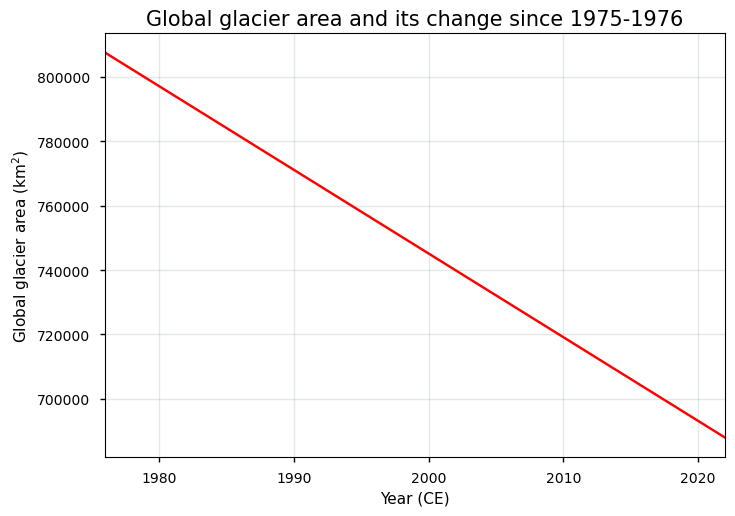

In [228]:
fig, ax = plt.subplots()
ax.plot(ds_timeseries["time"],ds_timeseries["glacier_area_km2"].sum(("latitude", "longitude"), keep_attrs=True),'r')
ax.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax.set_xlim(np.min(ds_timeseries["time"]),np.max(ds_timeseries["time"]))
ax.set_xlabel("Year (CE)")
ax.set_ylabel("Global glacier area (km$^2$)")
ax.set_title("Global glacier area and its change since "+ period_start.replace("_","-"),fontsize=15);plt.show()

As can be seen from the plot above, the glacier area results from a linear decrease over time. It is hence not derived from in-situ and/or remote sensing data, but rather inserted into the data as a parameterization. For proper assessment, we can compare the value around 2000 CE to that of the 'Glaciers distribution data from the Randolph Glacier Inventory (RGI) for year 2000' dataset, which is 746088.28 km$^2$ from the vector (shape file) product in RGI v6.0 (RGI Consortium, 2017):

In [230]:
# Calculate the total glacier area for the year 2000
total_glacier_area_2000 = ds_timeseries["glacier_area_km2"].sel(time=2000).sum(dim=("latitude", "longitude")).compute().item()
rgi_area = 746088.28
percentage_area = (total_glacier_area_2000 / rgi_area) * 100
print(f"The total global glacier area in the glacier mass change dataset in 2000 CE is {total_glacier_area_2000:.2f} km², which is {percentage_area:.2f}% of the area in the RGIv6.0 dataset.")

The total global glacier area in the glacier mass change dataset in 2000 CE is 745153.82 km², which is 99.87% of the area in the RGIv6.0 dataset.


Although the numbers above suggest a quality-rich dataset in terms of temporal coverage and extent, some potential limitations include:
- Although a threshold spatial resolution is not given by GCOS (2022), it is worth noting that data can not be consulted at the individual glacier-scale, instead the data are presented at a 0.5 degree global grid.
- It is impossible to determine the number of glaciers in a particular year for which mass or elevation changes are available. It is hence not possible to determine which regions are under/oversampled in space or time, or to quantify how many glacier mass change data are derived from the glaciological or geodetic methods respectively.
- The hydrological year varies from region to region, meaning that annual values from a pixel or region in the northern hemisphere are temporally not fully consistent with annual values from a pixel or region in the southern hemisphere.
- Data were furthermore measured and generated by different institutes/research groups and from different methods (i.e. the in-situ glaciological and satellite-based geodetic methods). As such, they were (with a high degree of certainty) not compiled in a fully consistent way for the entire dataset.

Quantitative details about the sampling density (i.e. number of sampled glaciers, either with the glaciological or geodetic method, per grid point) are thus not given in the dataset. A potential scarce observational sample can introduce significant biases and uncertainties into the analysis of long-term trends in glacier mass changes. It can lead to inaccurate representations of the trends and potential misinterpretations of regional/global climate signals. Ensuring a robust and representative observational sample is therefore crucial for reliable trend analysis and accurate assessments of climate change impacts on glaciers. 

From the data and metadata, it is hence not possible to determine whether the data are densely sampled enough to ensure that the observed trends are reliable and not affected by sparse data. An indication of the global distribution of glaciological mass change and geodetic elevation change observations from the WGMS Fluctuations of Glaciers database (applicable for version WGMS-FoG-2022-09) is, however, available from the ECMWF Confluence Wiki. While the glaciological sample covers ca. 500 glaciers only, the geodetic sample covers ca. 208,000 glaciers around the globe. Let us compare the number of sampled glaciers (208,500 in this dataset as mentioned in the ECMWF Confluence Wiki) to the total amount of glaciers in the RGIv6.0 dataset (RGI Consortium, 2017):

In [198]:
print(f"The total amount of glaciers used in the glacier mass change dataset is 208500, which is {100*(208500)/(216429):.2f}% of the amount of glaciers in the RGIv6.0 dataset.")

The total amount of glaciers used in the glacier mass change dataset is 208500, which is 96.34% of the amount of glaciers in the RGIv6.0 dataset.


From the plots and statement above, it can hence be concluded that the dataset covers all major glacier regions worldwide, including both polar and mountain glaciers. The large amount of glaciers used in the glacier mass change estimates of this dataset thus indicates that global-scale long-term trends are, with a high degree of certainty, not significantly biased due to a scarce observational sample. However, it must be noted that the glaciers with a seasonal to annual glaciological sample (ca. 500 glaciers) form the basis for the determination of annual mass changes from the multi-annual to decadal geodetic mass balances of neigbouring glaciers (ca. 208,000 glaciers), which may affect the mass change representativeness if these glaciers are located at large distances from each other. Glaciers with geodetic samples are also more prone to uncertainties in general, for example due to uncertainties related to volume to mass conversions. To assess the representativeness of the glacier mass change data, it is hence especially important to check the spatial distribution of the glaciers with a long, consistent and annual glaciological sample (which is not given in the data). 

Let us now go on and calculate linear and quadratic trends for the glacier mass change product.

### ❄️ Spatial distribution of glacier mass change (linear and quadratic) trends

Let us first plot the cumulative sum of glacier mass changes over time:

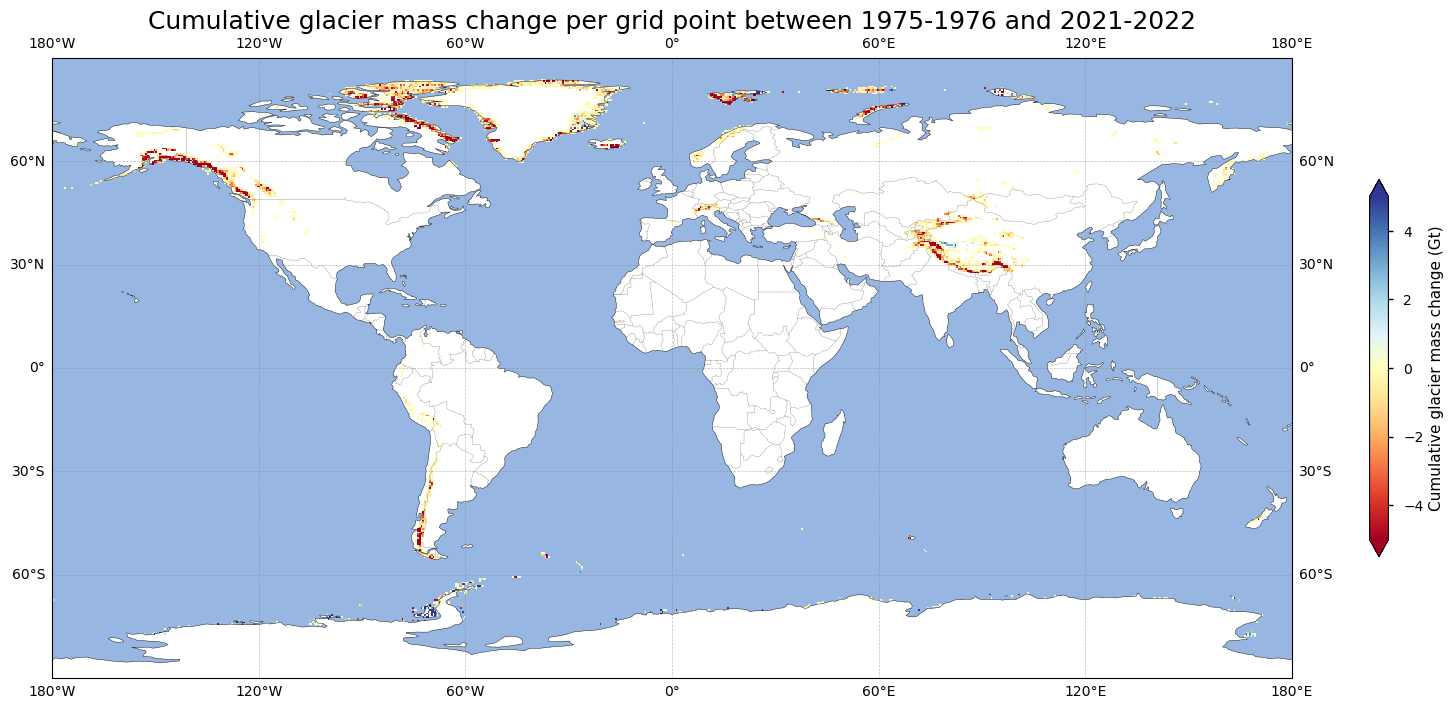

In [192]:
# Plot the gridded data
lon_grid, lat_grid = np.meshgrid(ds["longitude"].values, ds["latitude"].values)
fig=plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND,color='w')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS,linewidth=0.25,alpha=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
         linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
im=ax.pcolormesh(ds["longitude"].values, ds["latitude"].values, ((ds)["glacier_mass_change_gt"]).where((ds)['glacier_mass_change_gt'] != 0, np.nan), transform=ccrs.PlateCarree(), cmap = mpl.cm.RdYlBu, vmin=-5,vmax=5)
fig.colorbar(im,ax=ax,extend='both',shrink=0.49,label='Cumulative glacier mass change (Gt)')
plt.title('Cumulative glacier mass change per grid point between ' + period_start.replace("_", "-") + ' and ' + period_stop.replace("_", "-"), fontsize=18)
plt.show()

The most substantial glacier mass loss is observed in regions such as the western United States, Alaska, the southern Andes, Svalbard, the Alps, and the Himalayas. Conversely, only a few regions show mass gain, which is relatively minor in comparison. These changes reflect the global pattern of glacier retreat and ice loss over recent decades, highlighting the significant impact of climate change on glacial environments. Let us express the glacier mass changes in the form of linear trends:

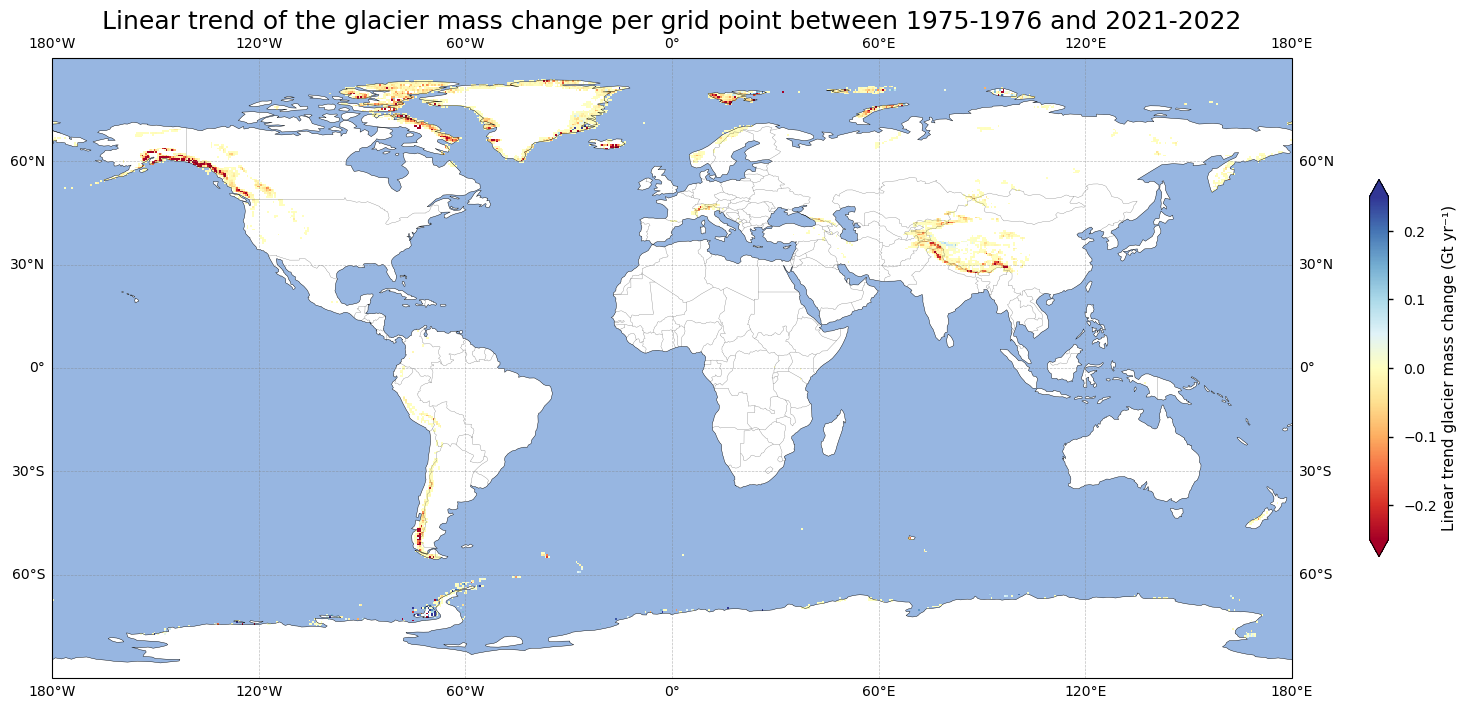

In [193]:
# Plot the gridded data
lon_grid, lat_grid = np.meshgrid(ds["longitude"].values, ds["latitude"].values)
fig=plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND,color='w')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS,linewidth=0.25,alpha=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
         linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
im=ax.pcolormesh(ds["longitude"].values, ds["latitude"].values, (ds)["Slope"].where((ds)['glacier_mass_change_gt'] != 0, np.nan), transform=ccrs.PlateCarree(), cmap = mpl.cm.RdYlBu, norm=mpl.colors.TwoSlopeNorm(vmin=-0.25,vcenter=0,vmax=0.25))
cb=fig.colorbar(im,ax=ax,extend='both',shrink=0.49,label='Linear trend glacier mass change (Gt yr⁻¹)')
cb.ax.set_yscale('linear')
plt.title('Linear trend of the glacier mass change per grid point between ' + period_start.replace("_", "-") + ' and ' + period_stop.replace("_", "-"), fontsize=18)
plt.show()

Prominent mass loss is again evident in regions such as Alaska, the western United States, the Andes, Svalbard, the Alps, and the Himalayas, where red tones (i.e. negative linear trends) dominate. In contrast, areas with mass gain are minimal, shown by isolated blue patches (i.e. positive linear trends). As with the cumulative mass changes, the plot of linear trends above underscores the persistent decrease in glacier mass over recent decades. Let us check for which pixels the linear trend of glacier mass changes over time is statistically significant at alpha = 0.05:

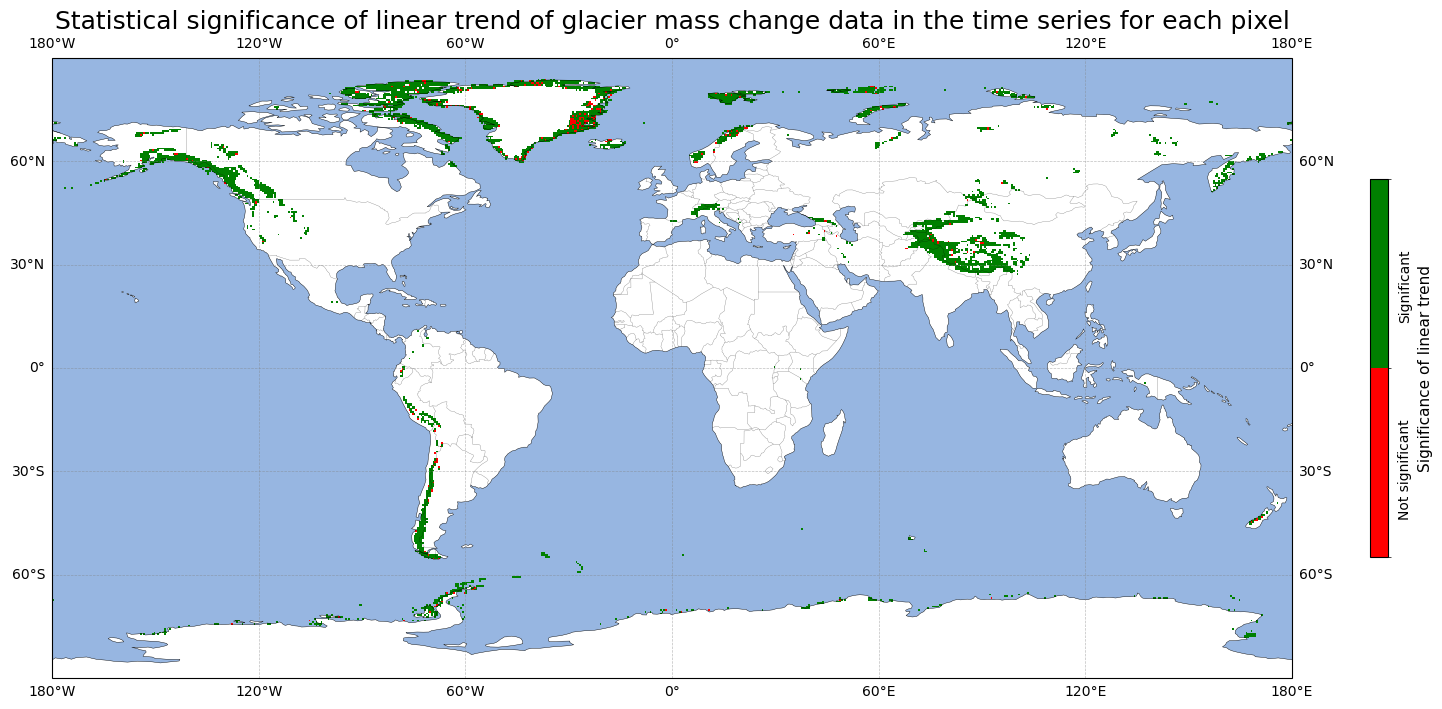

In [233]:
# Plot the gridded data
significance_level = 0.05
significant = ds["Pvalue1"].values < significance_level
# Define the boundaries for the colorbar
bounds = [0, 0.5, 1]  # Green (0), Red (1)
cmap = mpl.colors.ListedColormap(['red', 'green'])
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
lon_grid, lat_grid = np.meshgrid(ds["longitude"].values, ds["latitude"].values)
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND,color='w')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linewidth=0.25, alpha=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
significance = (ds["Pvalue1"] < significance_level).where(ds["glacier_mass_change_gt"] != 0)
# Plot the data
im = ax.pcolormesh(ds["longitude"].values, ds["latitude"].values, significance, 
                   transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
cb = fig.colorbar(im, ax=ax, shrink=0.49, label='Significance of linear trend', spacing="uniform")
cb.set_ticks([0.35, 0.80])  # Set the ticks at the midpoints of the ranges
cb.set_ticklabels([f'Not significant', f'Significant'])  # Set the tick labels
cb.ax.yaxis.set_tick_params(rotation=90)
cb.ax.yaxis.set_tick_params(length=0)
plt.title('Statistical significance of linear trend of glacier mass change data in the time series for each pixel', fontsize=18)
plt.show()

Let us quantify the number of pixels where a statistically significant negative linear trend prevails:

In [195]:
negative_trend = ds["Slope"] < 0
significant_trend = ds["Pvalue1"] < significance_level
negative_and_significant = negative_trend & significant_trend
count_non_nan_pixels = np.sum(negative_and_significant.values)
total_glacier_pixels = count_nonnan
print(f"The number of pixels with both a negative and statistically significant trend is {count_non_nan_pixels}, which is {(100*count_non_nan_pixels/total_glacier_pixels):.2f}% of the total pixels that hold glacier mass change data.")

The number of pixels with both a negative and statistically significant trend is 3590, which is 76.30% of the total pixels that hold glacier mass change data.


At last, we can also plot the glacier mass change accelerations (quadratic trends), which quantifies whether the rate of mass loss increases or decreases over time:

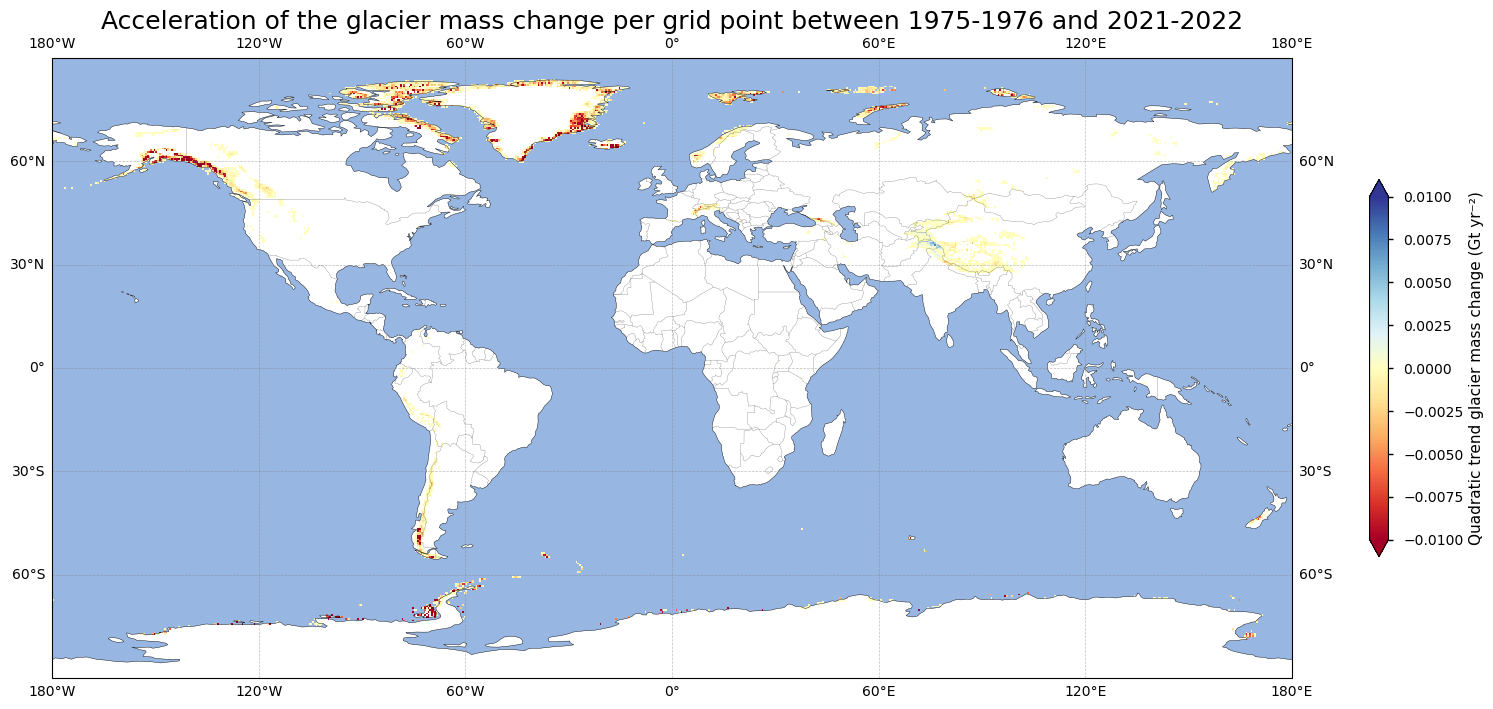

In [196]:
# Plot the gridded data
lon_grid, lat_grid = np.meshgrid(ds["longitude"].values, ds["latitude"].values)
fig=plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND,color='w')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS,linewidth=0.25,alpha=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
         linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
im=ax.pcolormesh(ds["longitude"].values, ds["latitude"].values, (ds)["Acceleration"].where((ds)['glacier_mass_change_gt'] != 0, np.nan), transform=ccrs.PlateCarree(), cmap = mpl.cm.RdYlBu, norm=mpl.colors.TwoSlopeNorm(vmin=-0.01,vcenter=0,vmax=0.01))
cb=fig.colorbar(im,ax=ax,extend='both',shrink=0.49,label='Quadratic trend glacier mass change (Gt yr⁻²)')
cb.ax.set_yscale('linear')
plt.title('Acceleration of the glacier mass change per grid point between ' + period_start.replace("_", "-") + ' and ' + period_stop.replace("_", "-"), fontsize=18)
plt.show()

The figure illustrates the acceleration of glacier mass change per grid point, measured in gigatonnes per year squared (Gt yr⁻²). Regions such as Alaska, Iceland, coastal Greenland, western Canada, and the southern Andes exhibit significant negative accelerations, indicating increasing glacier mass loss rates. Conversely, areas with positive accelerations are minimal. This regional variability underscores the accelerating impact of climate change on glacial regions worldwide, with high-latitude areas generally experiencing the most pronounced changes (i.e. polar amplification). 

### 📉 Trends in global total glacier mass changes

In the following section, we plot the global annual (and cumulative) glacier mass change over time. For the annual values, we therefore sum the gridded mass change product over the entire spatial domain for each individual year to get spatially summed values in Gt yr⁻¹:

$\Delta M 
$
[Gt yr⁻¹]
$ = \sum\limits^{x,y}\Delta {M_{x,y}}$ 

where $\Delta {M_{x,y}}$ is the glacier mass change (in Gt yr⁻¹) at pixel $x,y$ during a certain year $i$. 

The data can also be plotted in a cumulative way:

$
{M} 
$
[Gt]
$
= \sum\limits_{i={1976}}^{{{1976+n-1}}} (\Delta M_i)
$

with $n$ the total number of years in the time series. 

This results in the following plot:

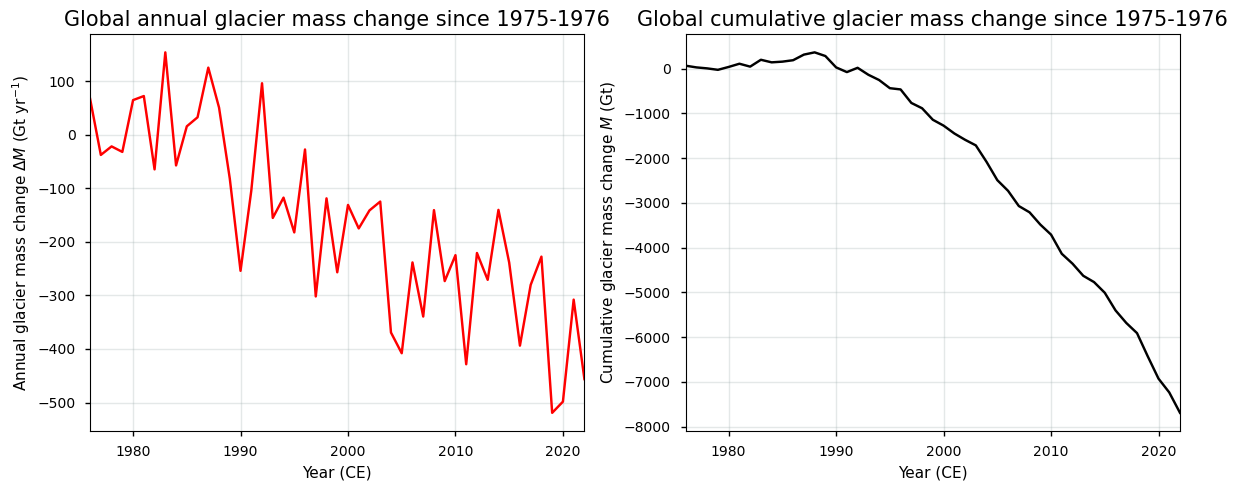

In [197]:
# Compute cumulative glacier mass change/balance and area
ds_glacier_gt = ds_timeseries["glacier_mass_change_gt"].sum(("latitude", "longitude"), keep_attrs=True)

# Plot data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(ds_timeseries["time"],ds_glacier_gt,'r')
ax1.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax1.set_xlim(np.min(ds_timeseries["time"]),np.max(ds_timeseries["time"]))
ax1.set_xlabel("Year (CE)")
ax1.set_ylabel("Annual glacier mass change $\Delta M$ (Gt yr$^{-1}$)")
ax1.set_title("Global annual glacier mass change since "+ period_start.replace("_","-"),fontsize=15)
ax2.plot(ds_timeseries["time"],np.cumsum(ds_glacier_gt),'k')
ax2.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax2.set_xlim(np.min(ds_timeseries["time"]),np.max(ds_timeseries["time"]))
ax2.set_xlabel("Year (CE)")
ax2.set_ylabel("Cumulative glacier mass change $M$ (Gt)")
ax2.set_title("Global cumulative glacier mass change since "+ period_start.replace("_","-"),fontsize=15)
plt.tight_layout()
plt.show()

We can also plot the annual global glacier mass changes in the style of the popular climate [warming stripes](https://showyourstripes.info) for a better visual representation:

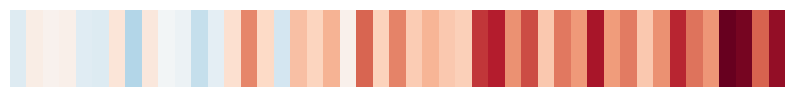

In [205]:
# Configure the figure
figure, axis = mpl.pyplot.subplots(1, 1, figsize=(10, 1))
axis.set_xlim(0, ds_glacier_gt.size)
axis.set_axis_off()
# Define a red (negative) to blue (positive) colorscale
colormap = mpl.pyplot.get_cmap('RdBu')
# Saturate colors 
normalizer = mpl.colors.Normalize(vmin=-np.max(abs(ds_glacier_gt.values)), vmax=np.max(abs(ds_glacier_gt.values)))
# Create a colored rectangle for each year
for i, value in enumerate(ds_glacier_gt):
    axis.add_patch(mpl.patches.Rectangle(
        xy=(i, 0), width=1, height=1, facecolor=colormap(normalizer(value))
    ))
# Show figure
mpl.pyplot.show()

At last, we can calculate the linear and quadratic trends of the global glacier mass change time series:

In [234]:
# Extract time and glacier data
time = ds_timeseries["time"].values
glacier_gt = np.cumsum(ds_glacier_gt)
# Extract most recent 30 years
last_30_time_values = time[-30:]
last_30_glacier_gt_values = glacier_gt[-30:]
# Calculate linear trend
coeffs = np.polyfit(time, glacier_gt, 1)  # 1 indicates a linear fit (degree 1 polynomial)
trend = np.polyval(coeffs, time)  # Evaluate the polynomial at the given time points
coeffs_30 = np.polyfit(last_30_time_values, last_30_glacier_gt_values, 1)  # 1 indicates a linear fit (degree 1 polynomial)
trend_30 = np.polyval(coeffs_30, last_30_time_values)  # Evaluate the polynomial at the given time points

# coeffs[0] is the slope, coeffs[1] is the intercept
print(f"The linear trend of the global glacier mass changes between {period_start.replace('_', '-')} and {period_stop.replace('_', '-')} is {coeffs[0]:.2f} Gt yr⁻¹. During the most recent 30 years, the trend is {coeffs_30[0]:.2f} Gt yr⁻¹.")

The linear trend of the global glacier mass changes between 1975-1976 and 2021-2022 is -167.30 Gt yr⁻¹. During the most recent 30 years, the trend is -257.64 Gt yr⁻¹.


Let us have this trend plotted:

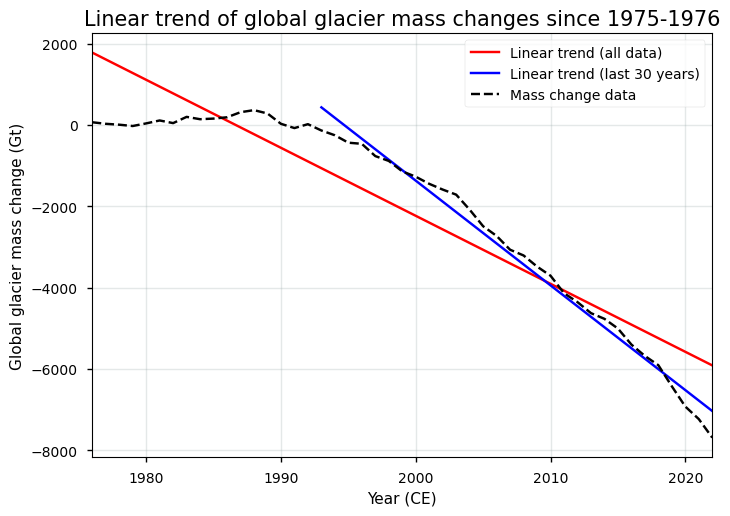

In [235]:
fig, ax = plt.subplots()
ax.plot(time,trend,'r',label='Linear trend (all data)')
ax.plot(last_30_time_values,trend_30,'b',label='Linear trend (last 30 years)')
ax.plot(time,np.cumsum(ds_glacier_gt),'k--',label='Mass change data')
ax.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax.set_xlim(np.min(time),np.max(time))
ax.set_xlabel("Year (CE)")
ax.set_ylabel("Global glacier mass change (Gt)")
ax.legend()
ax.set_title("Linear trend of global glacier mass changes since "+ period_start.replace("_","-"),fontsize=15);plt.show()

Now for the acceleration of the global glacier mass changes:

In [237]:
# Extract time and glacier data
time = ds_timeseries["time"].values
glacier_gt = np.cumsum(ds_glacier_gt)
# Calculate quadratic trend
coeffs = np.polyfit(time, glacier_gt, 2)  # 2 indicates a quadratic fit (degree 2 polynomial)
trend = np.polyval(coeffs, time)  # Evaluate the polynomial at the given time points
# Extract most recent 30 years
last_30_time_values = time[-30:]
last_30_glacier_gt_values = glacier_gt[-30:]
# Calculate quadratic trend
coeffs_30 = np.polyfit(last_30_time_values, last_30_glacier_gt_values, 2)  # 2 indicates a quadratic fit (degree 2 polynomial)
trend_30 = np.polyval(coeffs_30, last_30_time_values)  # Evaluate the polynomial at the given time points
# coeffs[0] is the quadratic term, coeffs[1] is the linear term, coeffs[2] is the intercept
print(f"The acceleration of the global glacier mass changes between {period_start.replace('_', '-')} and {period_stop.replace('_', '-')} is {(2*coeffs[0]):.2f} Gt yr⁻². During the most recent 30 years, the acceleration is {2*coeffs_30[0]:.2f} Gt yr⁻².")

The acceleration of the global glacier mass changes between 1975-1976 and 2021-2022 is -10.52 Gt yr⁻². During the most recent 30 years, the acceleration is -7.60 Gt yr⁻².


Let us have the quadratic trend plotted:

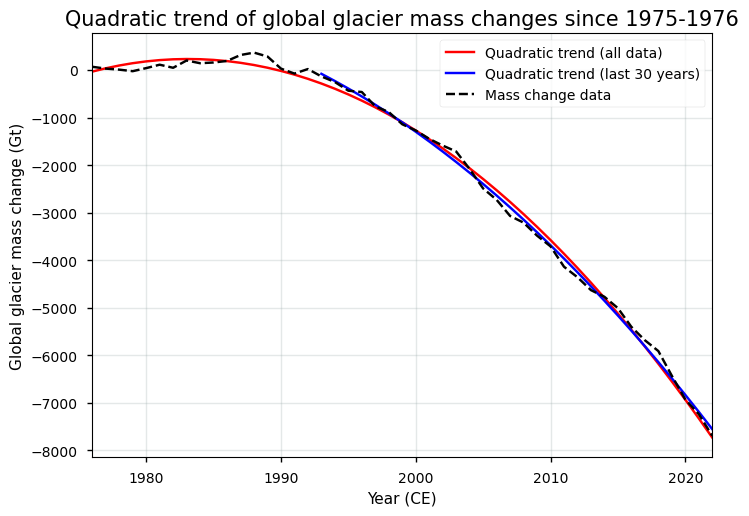

In [239]:
fig, ax = plt.subplots()
ax.plot(time,trend,'r',label='Quadratic trend (all data)')
ax.plot(last_30_time_values,trend_30,'b',label='Quadratic trend (last 30 years)')
ax.plot(time,np.cumsum(ds_glacier_gt),'k--',label='Mass change data')
ax.grid(color='#95a5a6',linestyle='-',alpha=0.25)
ax.set_xlim(np.min(time),np.max(time))
ax.set_xlabel("Year (CE)")
ax.set_ylabel("Global glacier mass change (Gt)")
ax.legend()
ax.set_title("Quadratic trend of global glacier mass changes since "+ period_start.replace("_","-"),fontsize=15);plt.show()

The linear trend of global glacier mass changes from 1975-1976 to 2021-2022 indicates a consistent decline. The quadratic trend shows an accelerating rate of these glacier mass losses. This suggests that the rate of global glacier mass loss has intensified over time, particularly during the more recent decades. The quadratic trend furthermore fits the observed data more closely than the linear trend, highlighting the increasing and non-linear impact of climate change on glaciers. This acceleration was also noted in other glacier mass changes products (e.g. Wouters et al., 2019; Hugonnet et al., 2021) and is also what can be expected from theory for a linear climate warming over time (e.g. Oerlemans et al., 1998):

$\dfrac{dM}{dt} = -S_T  A_{t_0} \rho_i T'$

where $S_T$ is the mass balance sensitivity to temperature changes (m yr$^{-1}$ K$^{-1}$), $A_{t_0}$ the glacier surface area (km$^2$), $\rho_i$ the density of ice (kg m$^{-3}$) and $T'$ the temperature perturbation (K). 

By assuming a linear temperature perturbation over time (i.e. $T' = \alpha (t - t_0)$), the equation can be rewritten as (with $\alpha$ in units of K yr$^{-1}$):

$dM = -S_T A_{t_0} \rho_i T' dt$ 

or when integrating over a time period between $t$ and $t_0$:

$ \int\limits^{t}_{t_0} dM = -S_T A_{t_0} \rho_i \int\limits^{t}_{t_0} \alpha (t - t_0)dt$

and by finally assuming ${t_0}$ = 0 and $M(t_0) = 0$, we get:

$M(t) = -\dfrac{1}{2} S_T A_{t_0} \rho_i \alpha t^2$

which thus quantifies a quadratic (accelerated) glacier mass decrease over time, as is also noted in the observations, highlighting the non-linear temperature-driven effects on global glacier mass changes.

### 📌 Implications for use of glacier mass change data as climate change indicators

When measured over a long period and at extended geographical scales, trends in glacier mass changes or mass balances can be considered a clear indicator of global climate change. However, for these trends to be accurate, representative and reliable, the dataset should have an adequate spatial/temporal resolution, coverage (extent) and sampling density to derive multi-year trends in glacier mass changes. From the above analysis, it can be stated that the dataset provides a suitable spatial (0.5 by 0.5 degrees) and temporal (annual) resolution to capture both linear and quadratic trends in annual glacier mass changes, enabling detailed analysis of long-term local (individual pixels), regional or global glacier mass change trends. The dataset's comprehensive temporal (> 30 years) and spatial (global) coverage of the world's glaciers furthermore ensures that these trends are meaningful and can be assessed at local, regional and global patterns. The Intergovernmental Panel on Climate Change (IPCC) namely uses 30 years as a standard period for climate normals and trend analysis to ensure that the analysis captures meaningful climatic changes rather than short-term (intra/interannual) fluctuations. Furthermore, the annual temporal resolution of 1 year satisfies the minimum GCOS requirement (GOCS, 2022). The statistical significance of these trends further underscores the reliability of using this dataset to monitor climatic changes at the global scale. The linear trend analysis reveals a significant consistent decline in glacier mass for the majority of pixels in the dataset, while the quadratic trend indicates an accelerating rate of mass loss, particularly in the more recent years. 

An important limitation to take into account here is that the dataset does not provide quantitative details about the sampling density, such as the number of sampled glaciers per grid point or the number of glaciers with either a glaciological or geodetic mass balance sample per grid point. Although the dataset itself does not confirm whether the data are densely sampled enough to ensure reliable trends, an indication from the ECMWF Confluence Wiki suggests that, while the glaciological sample covers approximately 500 glaciers, the geodetic sample covers around 208,000 glaciers globally. Comparing this to the total number of glaciers in the RGIv6.0 dataset (ca. 216,500 glaciers) reveals that the glacier mass change dataset almost covers all of the world's glaciers. This extensive coverage implies that the global-scale long-term trends are likely reliable and not significantly biased by a scarce sample. However, the reliance on a smaller subset of glaciers with annual glaciological samples (i.e. the 'surface' mass balance) to determine mass changes for a much larger set of glaciers with multi-annual geodetic samples (i.e. the 'total' mass balance, including internal and basal mass balance) could affect the representativeness of such mass changes, especially if these glaciers are geographically distant. This missing information related to the sampling can affect the accuracy and quality of long-term trend analyses of glacier mass changes for certain pixels. Additionally, geodetic samples in itself are already more prone to uncertainties in general, such as those related to volume-to-mass conversion errors. Therefore, checking the spatial distribution of glaciers with consistent and long-term glaciological samples is crucial for assessing the representativeness of the data.

Hence, despite some limitations related to the lack of quantitative estimates of the sampling density and the reliance of the data on a smaller subset of annually sampled glaciers, the extensive temporal/spatial coverage and resolution, as well as the statistical significance of the trends (which moreover comply with theoretical considerations), make this dataset well-suited and reliable for using glacier mass change as an indicator of global climatic changes.

## 🔍 If you want to know more

### Key resources

- "Glacier mass change gridded data from 1976 to present derived from the Fluctuations of Glaciers Database" on the CDS
- [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control` prepared by [BOpen](https://www.bopen.eu).

### References

- Berthier, E., Floriciou, D., Gardner, A.S., Gourmelen, N., Jakob, L., Paul, F., Treichler, D., Wouters, B., Belart, J.M.C., Dehecq, A., Dussaillant, I., Hugonnet, R., Kääb, A., Krieger, L., Pálsson, F., and Zemp, M. (2023). Measuring glacier mass changes from space—a review. Rep. Prog. Phys. 86, 036801. doi:10.1088/1361-6633/acaf8e.

- GCOS (Global Climate Observing System) (2022). The 2022 GCOS ECVs Requirements (GCOS-245). World Meteorological Organization: Geneva, Switzerland. doi: https://library.wmo.int/idurl/4/58111.

- Hugonnet, R., McNabb, R., Berthier, E., Menounos, B., Nuth, C., Girod, L., Huss, M., Farinotti, D., Dussaillant, I., Brun, F., and Kääb, A. (2021). Accelerated global glacier mass loss in the early twenty-first century. Nature 592, 726–731. doi: 10.1038/s41586-021-03436-z.

- RGI Consortium (2017). Randolph Glacier Inventory – A Dataset of Global Glacier Outlines: Version 6.0: Technical Report, Global Land Ice Measurements from Space, Colorado, USA. Digital Media. doi: 10.7265/N5-RGI-60.

- Oerlemans, J., Anderson, B., Hubbard, A., Huybrechts, P., Jóhannesson, T., W. H. Knap, M. Schmeits, A. P. Stroeven, R. S. W. van de Wal, J. Wallinga and Z. Zuo  (1998). Modelling the response of glaciers to climate warming. Climate Dynamics 14, 267–274. doi: 10.1007/s003820050222

- WGMS (2022). Fluctuations of Glaciers Database. doi: 10.5904/wgms-fog-2022-09.

- Wouters, B., Gardner, A. S., and Moholdt, G. (2019). Global Glacier Mass Loss During the GRACE Satellite Mission (2002-2016). Front. Earth Sci. 7. doi: 10.3389/feart.2019.00096.

- Zemp, M., Huss, M., Thibert, E., Eckert, N., McNabb, R., Huber, J., Barandun, M., Machguth, H., Nussbaumer, S. U., Gärtner-Roer, I., Thomson, L., Paul, F., Maussion, F., Kutuzov, S., and Cogley, J. G. (2019). Global glacier mass changes and their contributions to sea-level rise from 1961 to 2016. Nature, 568, 382–386. doi: 10.1038/s41586-019-1071-0.